In [37]:
source("K2methods.r")
library(purrr)
library(Rgraphviz)
library(bnlearn)
library(bnstruct)
set.seed(9112001)

In [20]:
data = child()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...



bnstruct :: imputation finished.



In [39]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
cat('The dataset dimensions are:', dim(DF))


# IF YOU RUN AGAIN THE PERMUTATION CHANGES
DF = DF[, sample(ncol(DF))]
head(DF)

The dataset dimensions are: 5000 20

,V14,V20,V2,V15,V17,V18,V3,V13,V11,V1,V8,V6,V16,V19,V9,V10,V5,V12,V7,V4
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,3,2,3,2,3,1,1,2,1,3,2,1,2,1,1,1,1,2
2,2,2,4,1,2,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1
3,2,2,3,2,2,1,1,2,2,2,2,3,1,2,2,1,1,2,1,2
4,2,2,4,1,1,1,1,1,3,2,1,3,3,1,2,1,1,1,1,1
5,2,2,2,2,1,1,1,1,3,2,1,4,1,2,1,1,2,1,1,2
6,2,2,2,2,1,1,1,3,3,2,3,4,2,3,2,1,1,1,1,2


In [41]:
struct = K2_algorithm(n = ncol(DF), u = 3, D = DF)

In [12]:
# struct = list(NA, 1, c(2, 1), c(3,2), c(3,2), c(3,5,1), 3, c(3,2), c(3,6), c(3,5), 
#     c(3,2), c(8,5), c(3,5), c(3,2), c(3,14), c(3,15), c(14,12,15), c(3,2), c(3,5), c(14,8))
struct

[[1]]
[1] NA

[[2]]
[1] 1

[[3]]
[1] 2 1

[[4]]
[1] 3 2

[[5]]
[1] 3 2

[[6]]
[1] 3 5 1

[[7]]
[1] 3

[[8]]
[1] 3 2

[[9]]
[1] 3 6

[[10]]
[1] 3 5

[[11]]
[1] 3 2

[[12]]
[1] 8 5

[[13]]
[1] 3 5

[[14]]
[1] 3 2

[[15]]
[1]  3 14

[[16]]
[1]  3 15

[[17]]
[1] 14 12 15

[[18]]
[1] 3 2

[[19]]
[1] 3 5

[[20]]
[1] 14  8

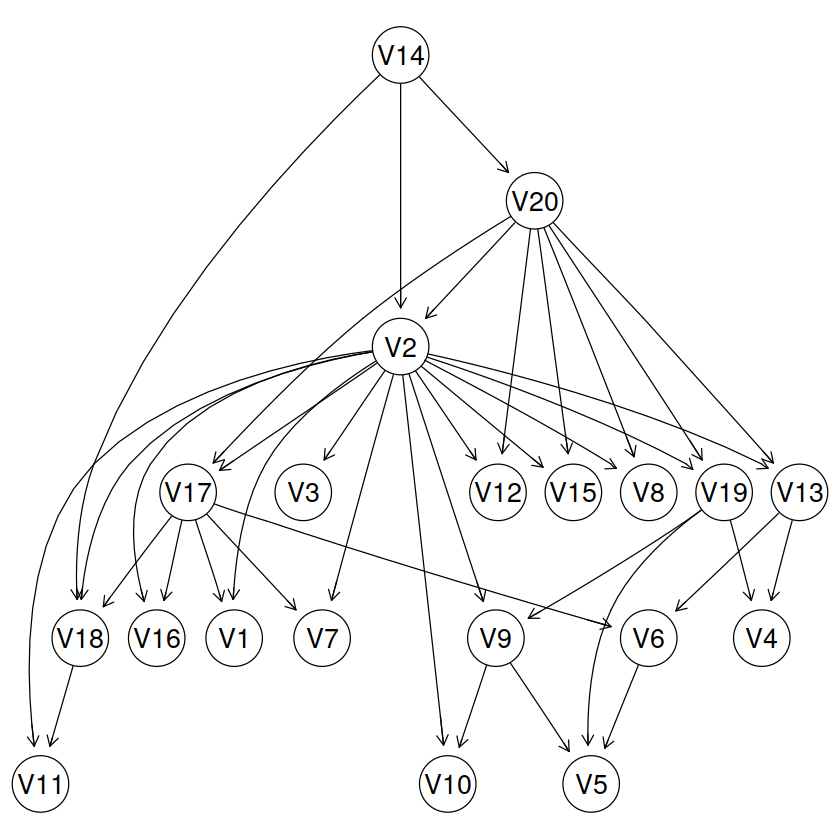

In [13]:
dag = get_dag(names(DF), struct)
graphviz.plot(dag)

In [14]:
score(dag, data = DF, type = 'bic')

[1] -73357.61